In [1]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [2]:
img_dir = "sample_images1" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*')
img_files = glob.glob(data_path)

In [3]:
#read pictures
shape_list = []
for i in img_files:
    img = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    shape_list.append(img)

In [4]:
#kernels
kernelx =  np.zeros((3,3), dtype=np.float64)
kernely =  np.zeros((3,3), dtype=np.float64)

#gradient x kernel
kernelx[1][0] = 1
kernelx[1][1] = -1

#gradient y kernel
kernely[1][1] = -1
kernely[1][2] = 1

#sobels
sobel_x = np.array([[-1, 0 ,1], [-2 ,0 ,2], [-1, 0, 1]], dtype=np.float64)/8
sobel_y = np.array([[-1, -2 ,-1], [0 ,0 ,0], [1, 2, 1]], dtype=np.float64)/8

In [5]:
def FlipKernel(kernel):
    flip_kernel = np.zeros(kernel.shape, dtype=np.float64)#empty matrix
    
    for i in range(kernel.shape[0],0,-1):
        for j in range(kernel.shape[1],0,-1):
            flip_kernel[i-1][j-1] = kernel[kernel.shape[0]-i][kernel.shape[1]-j]#write kernel in reverse order
            
    return flip_kernel

In [6]:
def Convolution(image, kernel):
    img_h, img_w = image.shape
    filter_size = kernel.shape[0]

    #add padding
    padding = int((kernel.shape[0]-1)/2)
    padding_add = int(padding*2)
    input_image_with_padding = np.zeros([image.shape[0]+padding_add, image.shape[1]+padding_add])
    input_image_with_padding[padding:img_h+padding, padding:img_w+padding] = image[:,:]

    #flip the kernel
    flip_filter = FlipKernel(kernel)

    #creeate empty image
    output_img = np.zeros(image.shape, dtype=image.dtype)

    #convolution
    for i in range(img_h):
        for j in range(img_w):
            temp = input_image_with_padding[i:i+filter_size, j:j+filter_size]
            output_img[i,j] = np.uint8(np.sum(np.double(temp)*np.double(flip_filter)))
        if i%100==0:# to track process
            print(img_h-i,end=" ")
    return output_img

In [22]:
#gradiant x
gradX = []
for img in shape_list:#traverse all images
    new_img = Convolution(img,kernelx)
    
    gradX.append(new_img)
    
    cv2.imshow('gradiant x', np.uint8(new_img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print('done')

512 412 312 212 112 12 208 108 8 1366 1266 1166 1066 966 866 766 666 566 466 366 266 166 66 done


In [7]:
#gradiant y
gradY = []
for img in shape_list:#traverse all images
    new_img = Convolution(img,kernely)
    
    gradY.append(new_img)
    
    cv2.imshow('gradiant y', np.uint8(new_img))
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
print('done')

512 412 312 212 112 12 208 108 8 1366 1266 1166 1066 966 866 766 666 566 466 366 266 166 66 done


In [23]:
#gradiant magnitude
for i in range(len(gradX)):#traverse all images
    image_magnitude = gradX[i]+gradY[i]

    abs_mag = cv2.normalize(image_magnitude, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    cv2.imshow('gradiant magnitude', np.uint8(abs_mag))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [24]:
#sobel x
sobelX = []
for img in shape_list:#traverse all images
    new_img = Convolution(img,sobel_x)
    
    sobelX.append(new_img)
    
    cv2.imshow('sobel x', np.uint8(new_img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print('done')

512 412 312 212 112 12 208 108 8 1366 1266 1166 1066 966 866 766 666 566 466 366 266 166 66 done


In [25]:
#sobel y
sobelY = []
for img in shape_list:#traverse all images
    new_img = Convolution(img,sobel_y)
    
    sobelY.append(new_img)
    
    cv2.imshow('#sobel y', np.uint8(new_img))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print('done')

512 412 312 212 112 12 208 108 8 1366 1266 1166 1066 966 866 766 666 566 466 366 266 166 66 done


In [13]:
#magnitude sobel
for i in range(len(sobelX)):#traverse all images
    image_magnitude = sobelX[i]+sobelY[i]

    abs_mag = cv2.normalize(image_magnitude, 0, 255, norm_type=cv2.NORM_MINMAX)

    cv2.imshow('magnitude sobel', np.uint8(abs_mag))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [14]:
img_dir = "sample_images2" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*')
img_files2 = glob.glob(data_path)
#read pictures
shape_list2 = []
for i in img_files2:
    img2 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    shape_list2.append(img2)

In [15]:
#0-128 siyah 128-256
def threshold(plot):
    weight_black = np.cumsum(plot[:128])#cummulative summation
    weight_white = np.cumsum(plot[128:])
    
    mean_black = np.cumsum(plot[:128]*6)/weight_black[-1]#mean value
    mean_white = np.cumsum(plot[128:]*6)/weight_white[-1]
    
    variance = weight_black * weight_white * (mean_black - mean_white)**2#varience
    max_var=np.argmax(variance)#biggest value of variance
    
    #dont let threashold to be compeletly black or white
    if(max_var==255):
        max_var -=1
    elif(max_var==0):
        max_var +=1
    
    return max_var

In [16]:
def applyThreshold (img, plot,flag):
    empt_img = np.zeros(img.shape,dtype = np.int8)#create empty image
    
    if flag==-1:#treashold will be found auto
        T = threshold(plot)
    else:#threashold value is given
        T=flag
    
    #apply threashold
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            color = img[row][col]
            if T>=color:
                empt_img[row][col] = 0
            else:
                empt_img[row][col]=255
    return empt_img

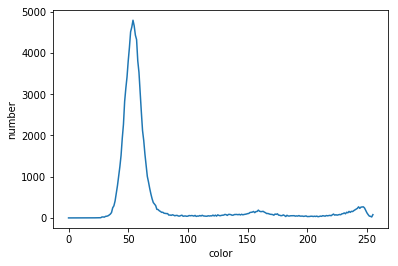

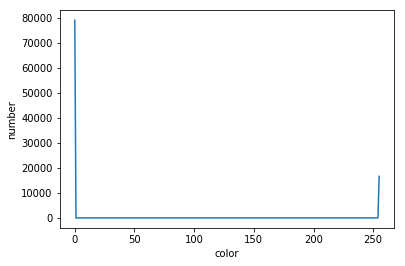

In [27]:
#Question 3  Plot the histogram
histog = []
i=0
for img in shape_list2:
    histog.append(np.zeros(256))
    for row in range(img.shape[0]):#distingues colors of the images in to an array
        for col in range(img.shape[1]):
            color = img[row][col]
            histog[i][color]+=1
            
    plt.plot(histog[i])
    plt.xlabel('color')
    plt.ylabel('number')
    plt.show()
    i+=1

In [21]:
thold_Imgs = []
for j in range(len(shape_list2)):
    new_img = applyThreshold(shape_list2[j], histog[j],-1)
    thold_Imgs.append(new_img)
    
    cv2.imshow('Threshold', np.hstack((np.uint8(shape_list2[j]), np.uint8(new_img))))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [19]:
#ground truthla treashholdlu resmin pixellerini karsilastir farkliysa false count++
ground_truth = thold_Imgs[1]
tHoldImgT = thold_Imgs[0]

tpr = []
fpr = []

for i in range(0,256,16):#different threashold values
    tHoldImg = applyThreshold(shape_list2[0],histog[0],i)
    truePos=0
    trueNeg=0
    falsePos=0
    falseNeg=0
    for row in range(ground_truth.shape[0]):
        for col in range(ground_truth.shape[1]):
            if ground_truth[row][col] == tHoldImg[row][col]:#image values are same: true
                if ground_truth[row][col]==-1:
                    trueNeg+=1 #negative value
                else:
                    truePos+=1 #positive value
            else:#image values are different: false
                if ground_truth[row][col]==-1:
                    falsePos+=1 #negative value
                else:
                    falseNeg+=1 #positive value
    pos = truePos + falseNeg
    neg = trueNeg + falsePos
    
    posr = truePos/pos
    negr = falsePos/neg
    
    tpr.append(posr)
    fpr.append(negr)
    

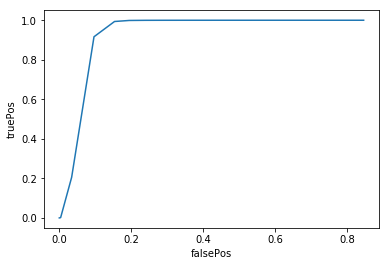

In [28]:
plt.plot(fpr,tpr)
plt.xlabel('falsePos')
plt.ylabel('truePos')
plt.show() 